In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [10]:
scripts_unconc = pd.read_csv("results/data/scripts_data_unconcurrent.csv")
scripts_conc = pd.read_csv("results/data/scripts_data_concurrent.csv")
scripts_conc

,script name,code lines,nodes at start,total time,rules time,kb_lookup time,pipeline time,nodes at end
0,short1,12,149,0.27,0.16728,0.00339,0.02468,16
1,short2,5,75,0.17,0.10181,0.00147,0.01191,21
2,short3,5,68,0.15,0.08317,0.00028,0.00980,12
3,short4,6,104,0.23,0.13410,0.00168,0.01500,25
4,short5,3,62,0.22,0.15511,0.00129,0.00891,14
...,...,...,...,...,...,...,...,...
565,kaggle12,36,299,0.64,0.47669,0.00239,0.06179,47
566,kaggle13,68,1157,2.34,1.48682,0.00416,0.57578,224
567,kaggle14,133,1554,3.82,2.62276,0.00439,0.66000,270
568,kaggle15,31,372,1.36,1.15761,0.00347,0.08846,56


### Total unconcurrent vs concurrent times

In [7]:
times_per_sync_type = pd.DataFrame()
times_per_sync_type["code lines"] = scripts_unconc["code lines"]
times_per_sync_type["sequential times"] = scripts_unconc["rules time"]
times_per_sync_type["concurrent times"] = scripts_conc["rules time"]

# sort by code lines
times_per_sync_type = times_per_sync_type.sort_values("code lines")
#times_per_sync_type = times_per_sync_type.drop(times_per_sync_type['sequential times'].idxmax())
#times_per_sync_type = times_per_sync_type.drop(times_per_sync_type['sequential times'].idxmax())

# create speed up data frame
speed_up = pd.DataFrame()
speed_up["code lines"] = times_per_sync_type["code lines"]
speed_up["speed up"] = times_per_sync_type['sequential times']/times_per_sync_type['concurrent times']

# group by
times_per_sync_type = times_per_sync_type.groupby("code lines")[['sequential times', 'concurrent times']].mean()
times_per_sync_type

,sequential times,concurrent times
code lines,,
3,0.115670,0.163036
4,0.158955,0.192295
5,0.126693,0.148124
6,0.123582,0.134586
9,0.215168,0.265477
10,0.358740,0.333889
11,0.113533,0.202967
12,0.290052,0.264085
13,0.283327,0.284780


<Figure size 432x288 with 0 Axes>

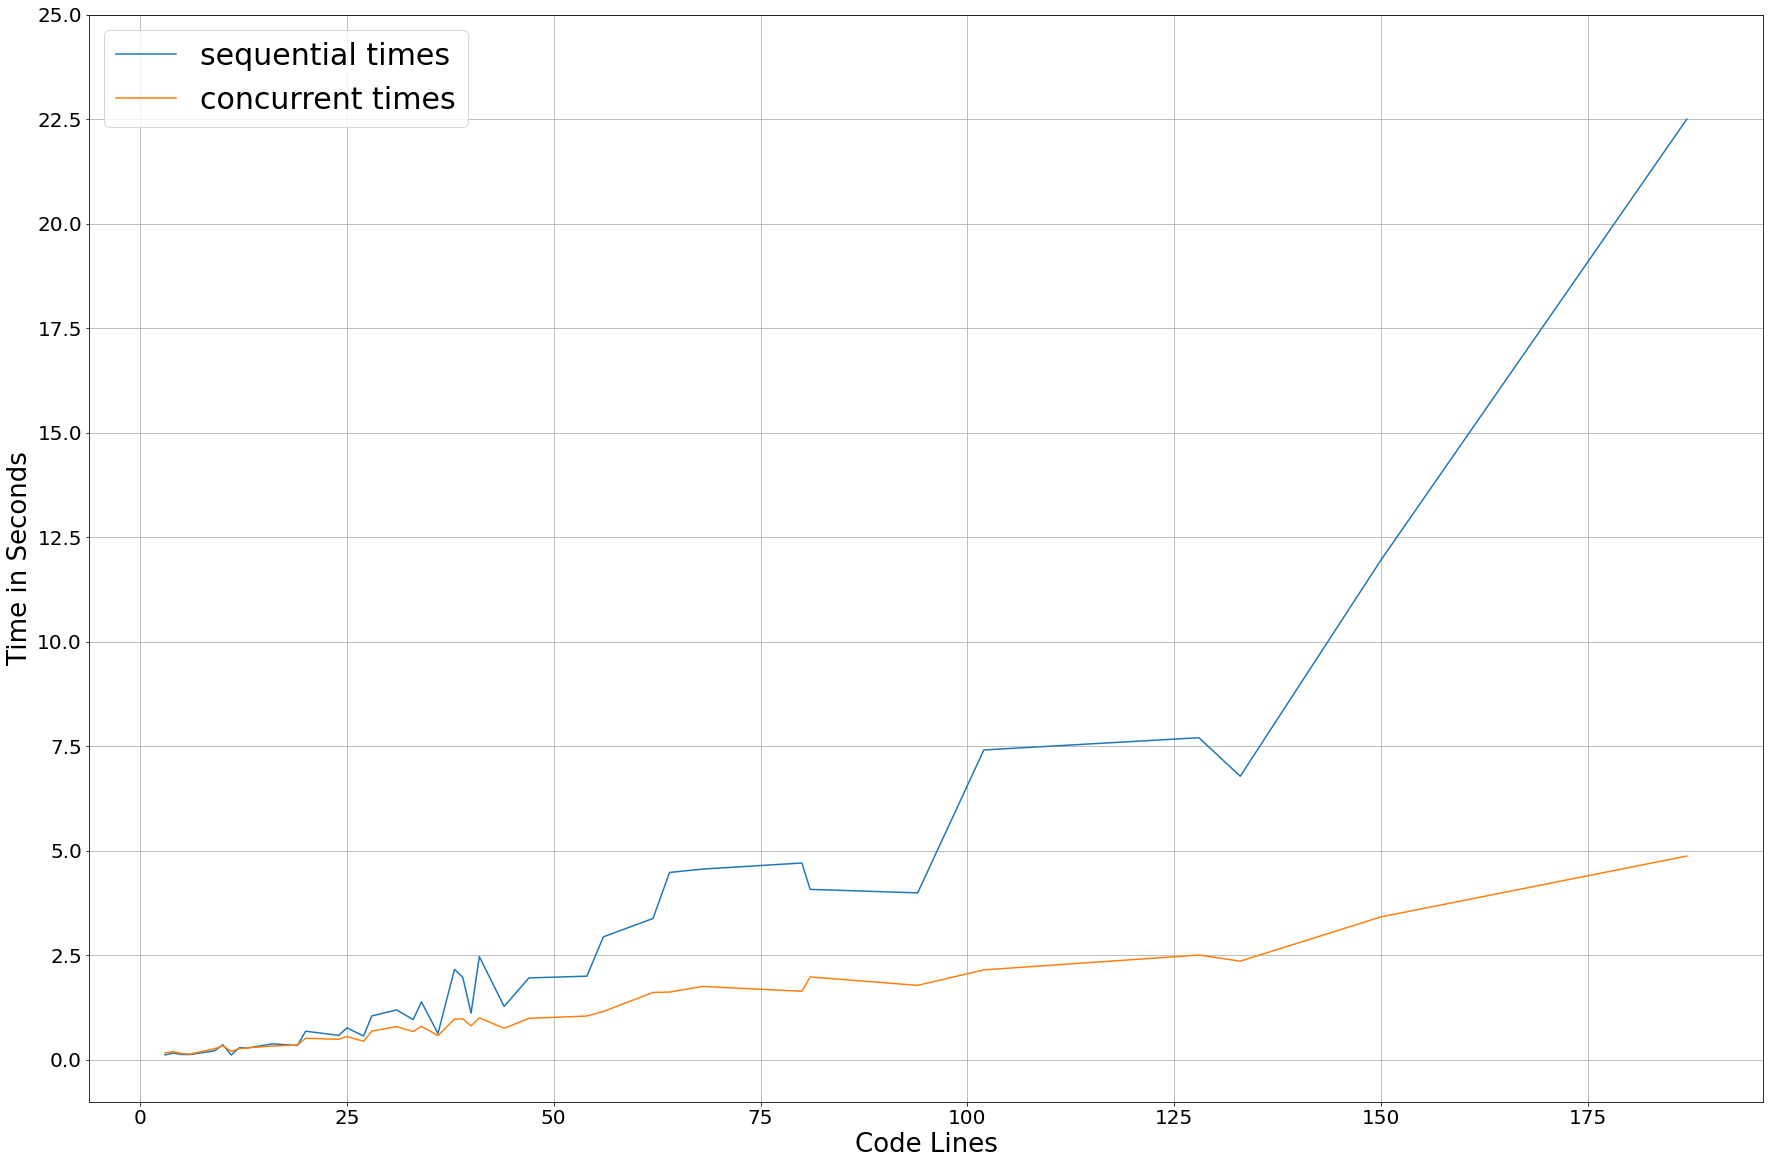

In [4]:
plt.figure()
plt.rcParams.update({'font.size': 26})
plot = times_per_sync_type.plot(figsize=(30,20), fontsize=20, yticks=[0,2.5,5,7.5,10,12.5,15,17.5,20,22.5,25], grid=True, ylabel = "Time in Seconds", xlabel = "Code Lines").legend(fontsize=30)

In [9]:
speed_up = speed_up.groupby("code lines")[['speed up']].mean()
speed_up

,speed up
code lines,
3,0.698891
4,0.835270
5,0.839748
6,0.922672
9,0.938470
10,1.268632
11,0.662007
12,1.097811
13,1.037006


<Figure size 432x288 with 0 Axes>

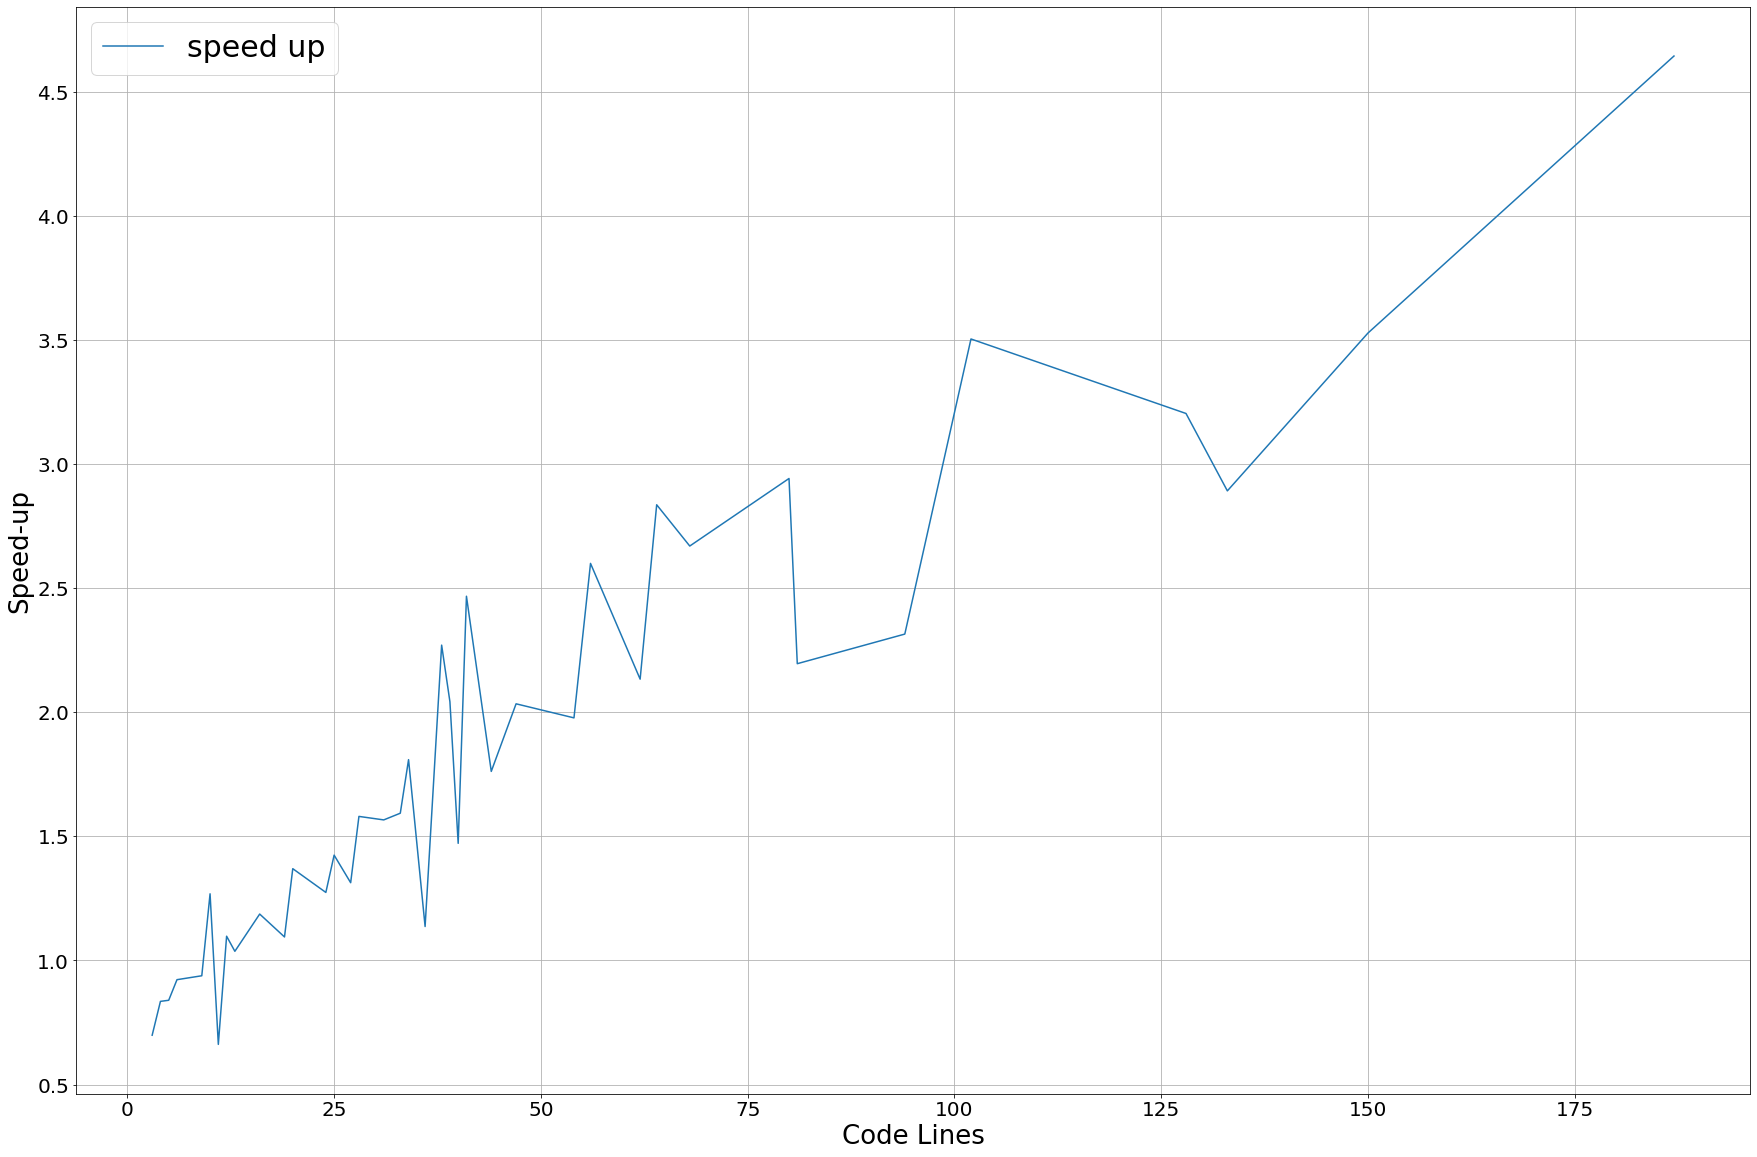

In [10]:
plt.figure()
plt.rcParams.update({'font.size': 26})
plot5 = speed_up.plot(figsize=(30,20), fontsize=20, grid=True, ylabel = "Speed-up", xlabel = "Code Lines").legend(fontsize=30)

### Total by rules, pipeline, kb lookup

In [4]:
times_by_job = pd.DataFrame()
conc_by_task = pd.read_csv("results/data/conc_by_task.csv")
times_by_job["code lines"] = conc_by_task["code lines"]
times_by_job["total time"] = conc_by_task["total time"]
times_by_job["AST creation time"] = conc_by_task["ast time"]
times_by_job["preprocessing time"] = conc_by_task["preprocessing time"]
times_by_job["rule application time"] = conc_by_task["rules time"]
times_by_job["pipeline creation time"] = conc_by_task["pipeline time"]
times_by_job["postprocessing time"] = conc_by_task["postprocessing time"]
times_by_job["knowledge base lookup time"] = conc_by_task["kb_lookup time"]

# sort by code lines
times_by_job = times_by_job.sort_values("code lines")

# group by code lines, calculate mean
times_by_job = times_by_job.groupby("code lines")[["total time", "AST creation time", "preprocessing time", "rule application time", "pipeline creation time", "postprocessing time","knowledge base lookup time"]].mean()
times_by_job

,total time,AST creation time,preprocessing time,rule application time,pipeline creation time,postprocessing time,knowledge base lookup time
code lines,,,,,,,
3,0.246500,0.002500,0.064863,0.161653,0.012305,0.000802,0.001696
4,0.258000,0.001000,0.063460,0.169057,0.016361,0.000930,0.001201
5,0.233333,0.003333,0.062566,0.145795,0.017886,0.000948,0.000634
6,0.250000,0.000000,0.064269,0.159910,0.017137,0.001294,0.001863
9,0.308000,0.000000,0.066039,0.208029,0.024013,0.004414,0.000436
10,0.363000,0.000000,0.070709,0.242539,0.039533,0.001388,0.002397
11,0.243000,0.000000,0.065773,0.155397,0.015361,0.002121,0.000342
12,0.384500,0.004000,0.076472,0.249097,0.048022,0.002205,0.001782
13,0.446500,0.000000,0.075491,0.303245,0.055739,0.002813,0.002989


<Figure size 432x288 with 0 Axes>

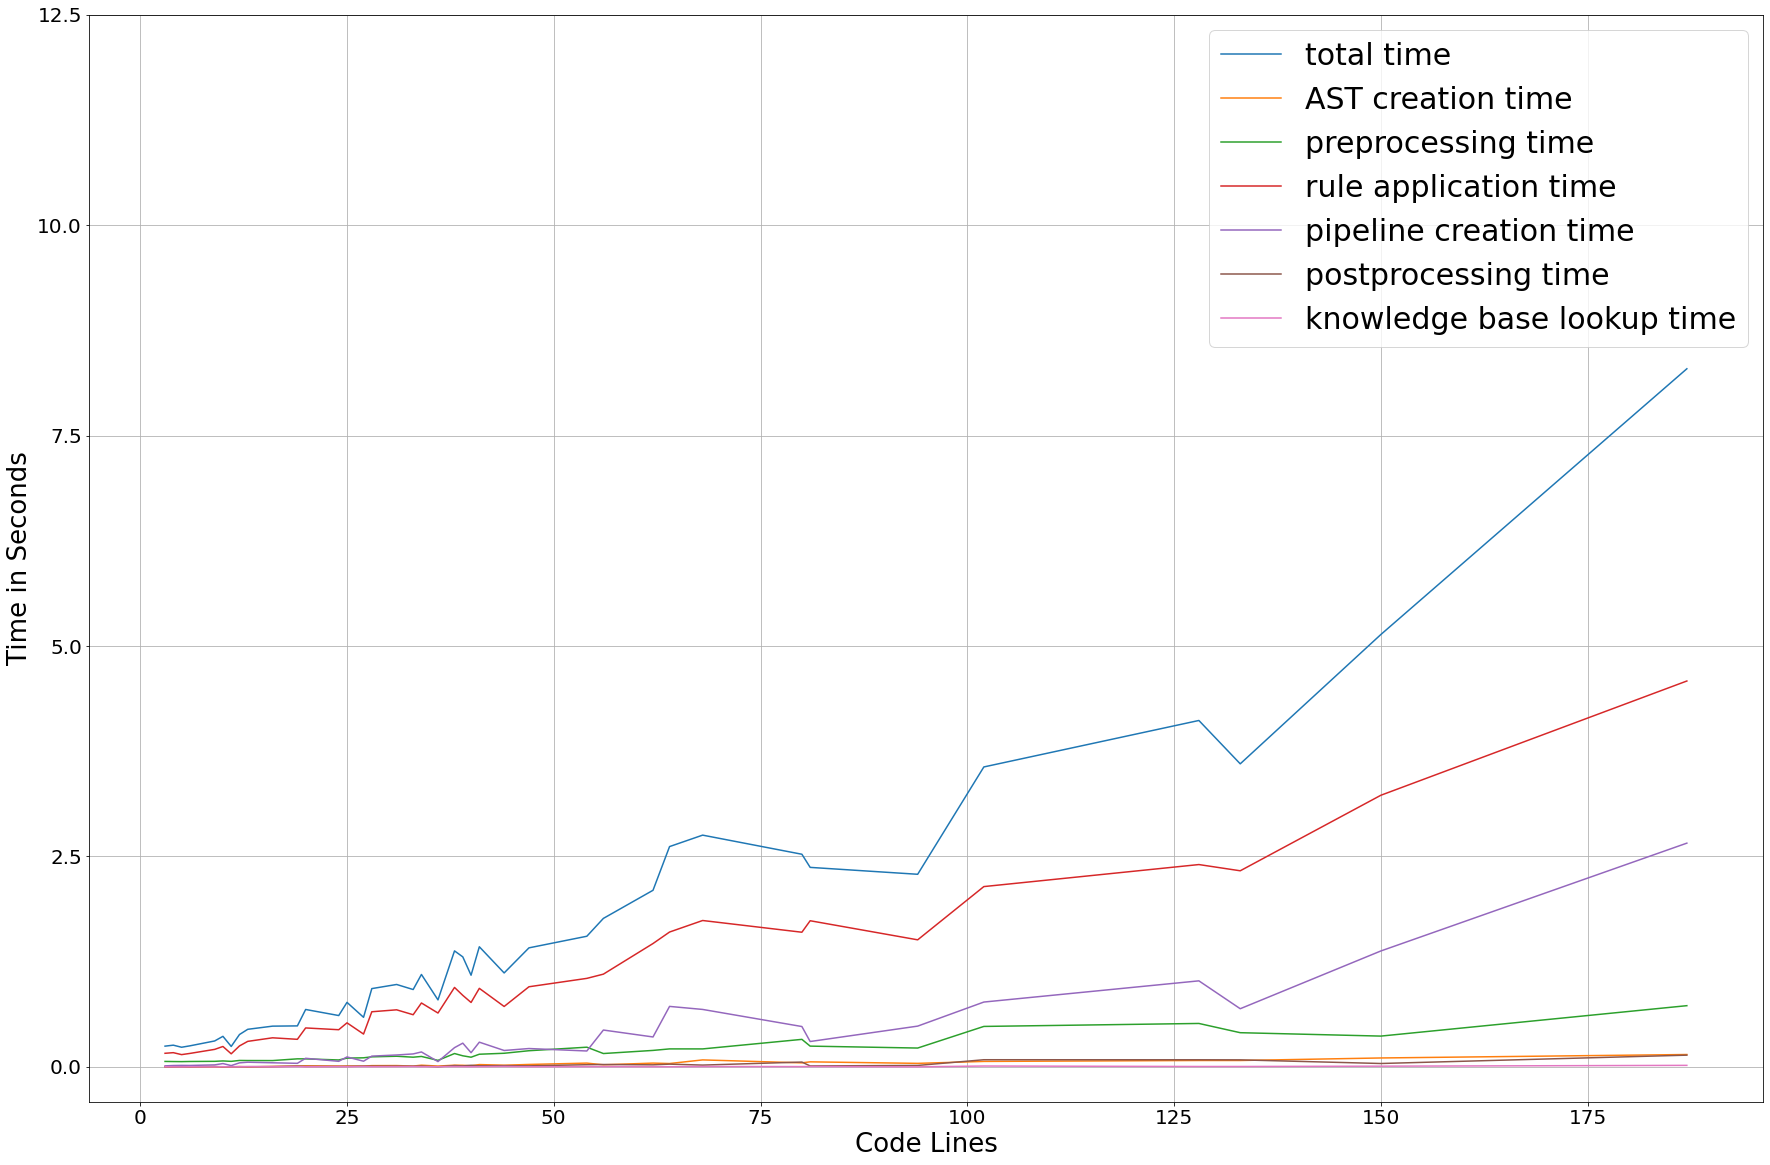

In [5]:
plt.figure()
plt.rcParams.update({'font.size': 26})
plot1 = times_by_job.plot(figsize=(30,20), fontsize=20, yticks=[0,2.5,5,7.5,10,12.5], grid=True, ylabel = "Time in Seconds", xlabel = "Code Lines").legend(fontsize=30)

### Not optimized instance search times

In [6]:
regraph_matching = pd.read_csv("results/data/regraph_matching.csv")

regraph_times = pd.DataFrame()
regraph_times["nodes at start"] = regraph_matching["nodes at start"]
regraph_times["total time"] = regraph_matching["total time"]
regraph_times["rule application time"] = regraph_matching["rules time"]
regraph_times["pipeline creation time"] = regraph_matching["pipeline time"]

# sort by code lines
regraph_times = regraph_times.sort_values("nodes at start")

# group by code lines, calculate mean
regraph_times = regraph_times.groupby("nodes at start")[["total time", "rule application time", "pipeline creation time"]].mean()
regraph_times

,total time,rule application time,pipeline creation time
nodes at start,,,
62,1.068,0.803081,0.203591
68,0.793,0.473594,0.258330
75,2.100,1.264419,0.774238
100,1.877,1.297395,0.500750
104,3.384,1.820190,1.494888
149,2.769,0.929760,1.762766
151,4.338,1.639021,2.626951
177,16.642,11.441709,5.122999
199,16.347,3.189124,13.074862


<Figure size 432x288 with 0 Axes>

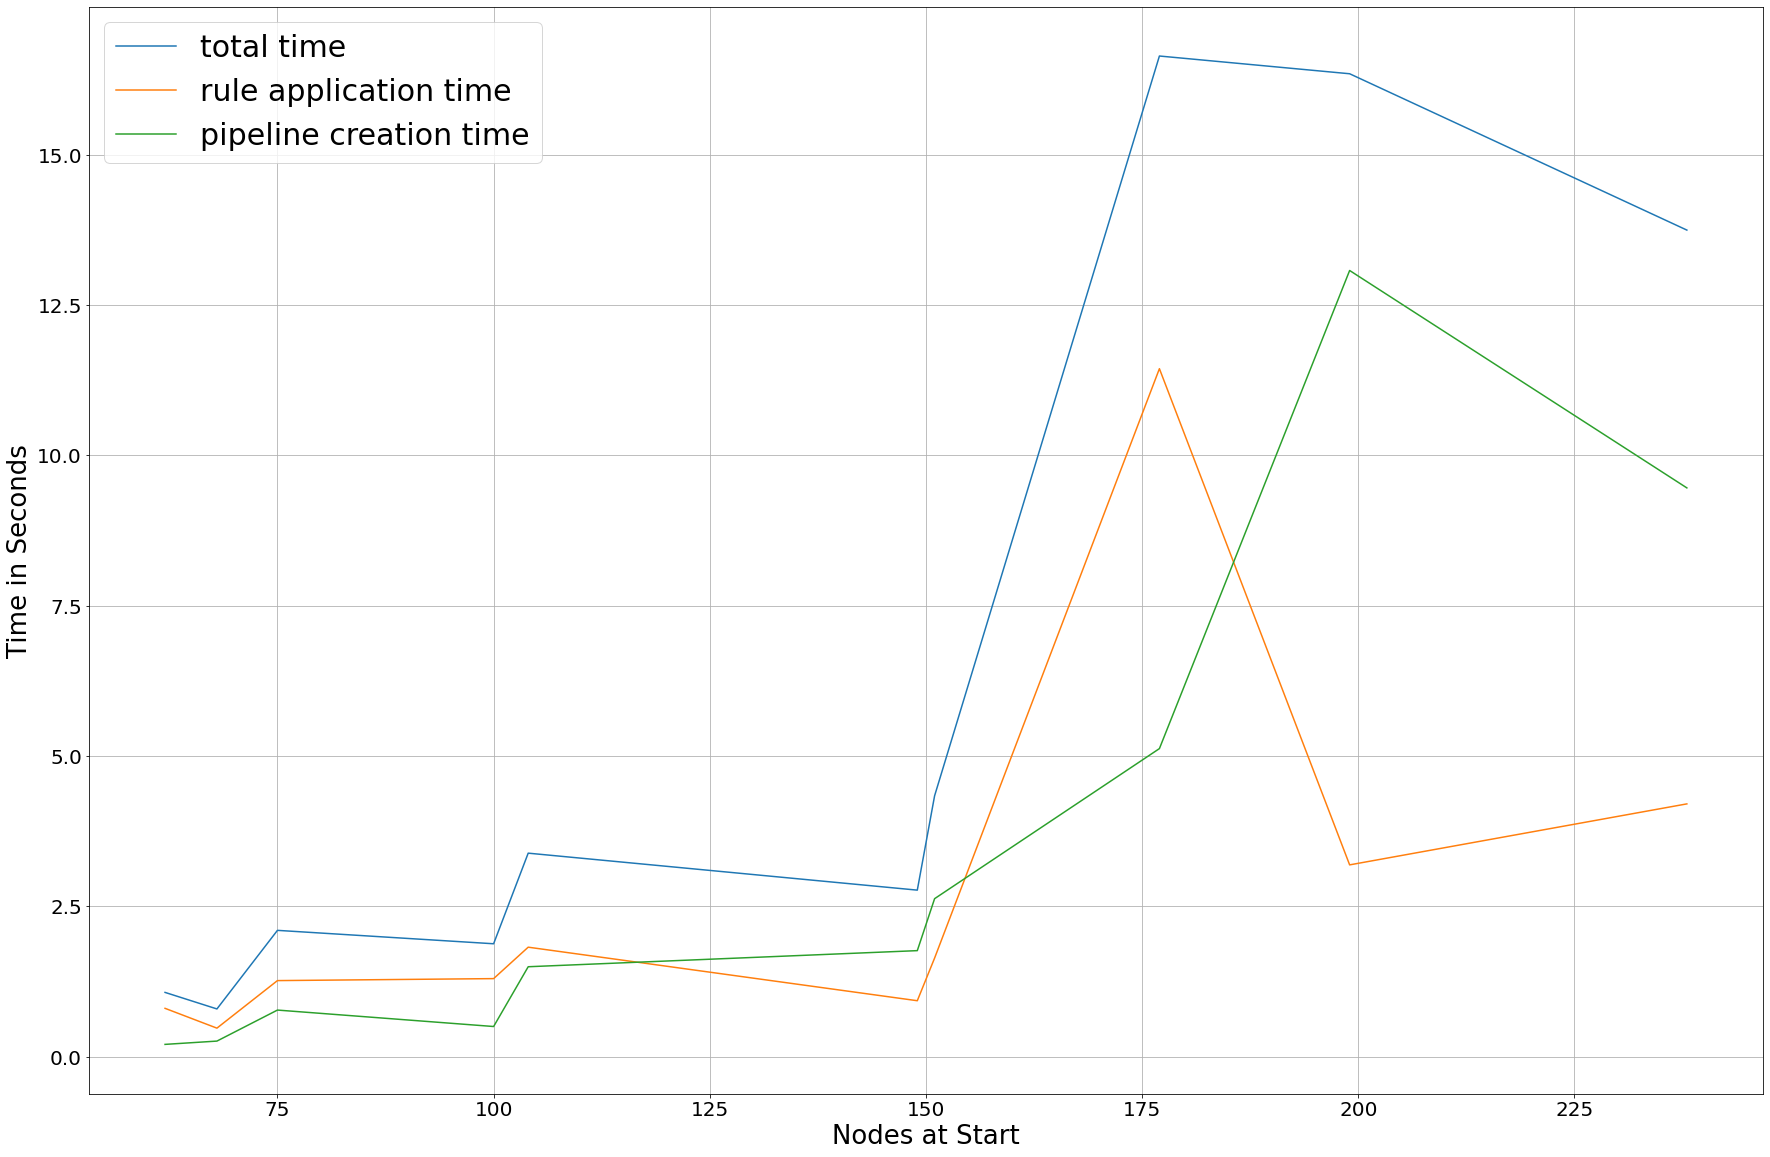

In [7]:
plt.figure()
plt.rcParams.update({'font.size': 26})
plot2 = regraph_times.plot(figsize=(30,20), fontsize=20, grid=True, ylabel = "Time in Seconds", xlabel = "Nodes at Start").legend(fontsize=30)

In [10]:
regraph_matching = pd.read_csv("results/data/regraph_matching.csv")

regraph_times2 = pd.DataFrame()
regraph_times2["code lines"] = regraph_matching["code lines"]
regraph_times2["total time"] = regraph_matching["total time"]
regraph_times2["rule application time"] = regraph_matching["rules time"]
regraph_times2["pipeline creation time"] = regraph_matching["pipeline time"]
regraph_times2["knowledge base lookup time"] = regraph_matching["kb_lookup time"]

# sort by code lines
regraph_times2 = regraph_times2.sort_values("code lines")

# group by code lines, calculate mean
regraph_times2 = regraph_times2.groupby("code lines")[["total time", "rule application time", "pipeline creation time"]].mean()
regraph_times2

,total time,rule application time,pipeline creation time
code lines,,,
3,1.068000,0.803081,0.203591
4,16.642000,11.441709,5.122999
5,5.546667,1.980525,3.497204
6,3.384000,1.820190,1.494888
9,4.338000,1.639021,2.626951
11,1.877000,1.297395,0.500750
12,2.769000,0.929760,1.762766
13,16.347000,3.189124,13.074862


<Figure size 432x288 with 0 Axes>

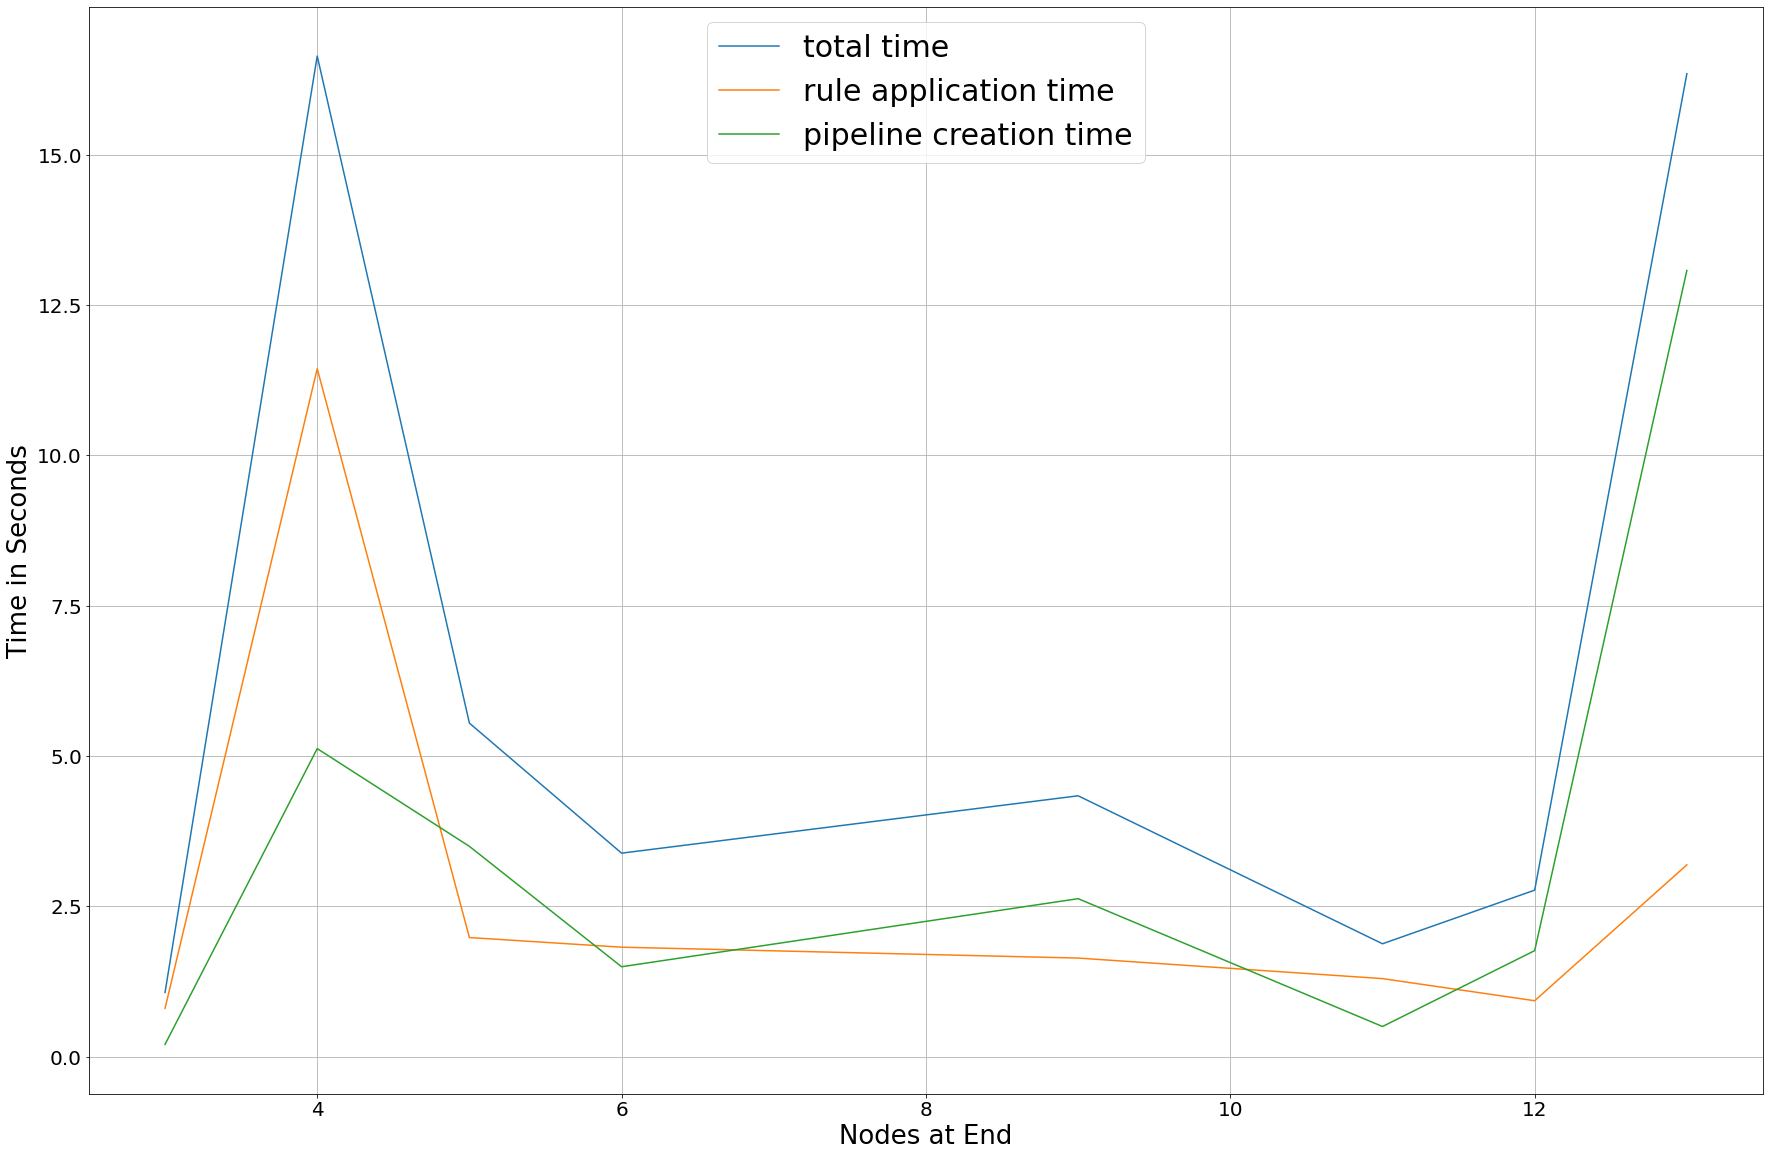

In [11]:
plt.figure()
plt.rcParams.update({'font.size': 26})
plot3 = regraph_times2.plot(figsize=(30,20), fontsize=20, grid=True, ylabel = "Time in Seconds", xlabel = "Nodes at End").legend(fontsize=30)

### Optimized vs unoptimized comparison

In [12]:
regraph_df = pd.read_csv("results/data/regraph_matching.csv")
vf2_df = pd.read_csv("results/data/VF2_matching.csv")

vf2_vs_regraph = pd.DataFrame()
vf2_vs_regraph["code lines"] = regraph_df["code lines"]
vf2_vs_regraph["total regraph time"] = regraph_df["total time"]
vf2_vs_regraph["total vf2 time"] = vf2_df["total time"]

# sort by code lines
vf2_vs_regraph = vf2_vs_regraph.sort_values("code lines")

# group by code lines, calculate mean
vf2_vs_regraph = vf2_vs_regraph.groupby("code lines")[["total regraph time", "total vf2 time"]].mean()
vf2_vs_regraph

,total regraph time,total vf2 time
code lines,,
3,1.068000,0.182000
4,16.642000,0.290000
5,5.546667,0.247333
6,3.384000,0.238000
9,4.338000,0.314000
11,1.877000,0.243000
12,2.769000,0.310000
13,16.347000,0.439000


In [7]:
regraph_df = pd.read_csv("results/data/regraph_matching.csv")
vf2_df = pd.read_csv("results/data/VF2_matching.csv")

vf2_vs_regraph = pd.DataFrame()
vf2_vs_regraph["nodes at start"] = regraph_df["nodes at start"]
vf2_vs_regraph["total regraph time"] = regraph_df["total time"]
vf2_vs_regraph["total vf2 time"] = vf2_df["total time"]

# sort by code lines
vf2_vs_regraph = vf2_vs_regraph.sort_values("nodes at start")

# group by code lines, calculate mean
vf2_vs_regraph = vf2_vs_regraph.groupby("nodes at start")[["total regraph time", "total vf2 time"]].mean()
vf2_vs_regraph

,total regraph time,total vf2 time
nodes at start,,
62,1.068,0.182
68,0.793,0.209
75,2.100,0.202
100,1.877,0.243
104,3.384,0.238
149,2.769,0.310
151,4.338,0.314
177,16.642,0.290
199,16.347,0.439


<Figure size 432x288 with 0 Axes>

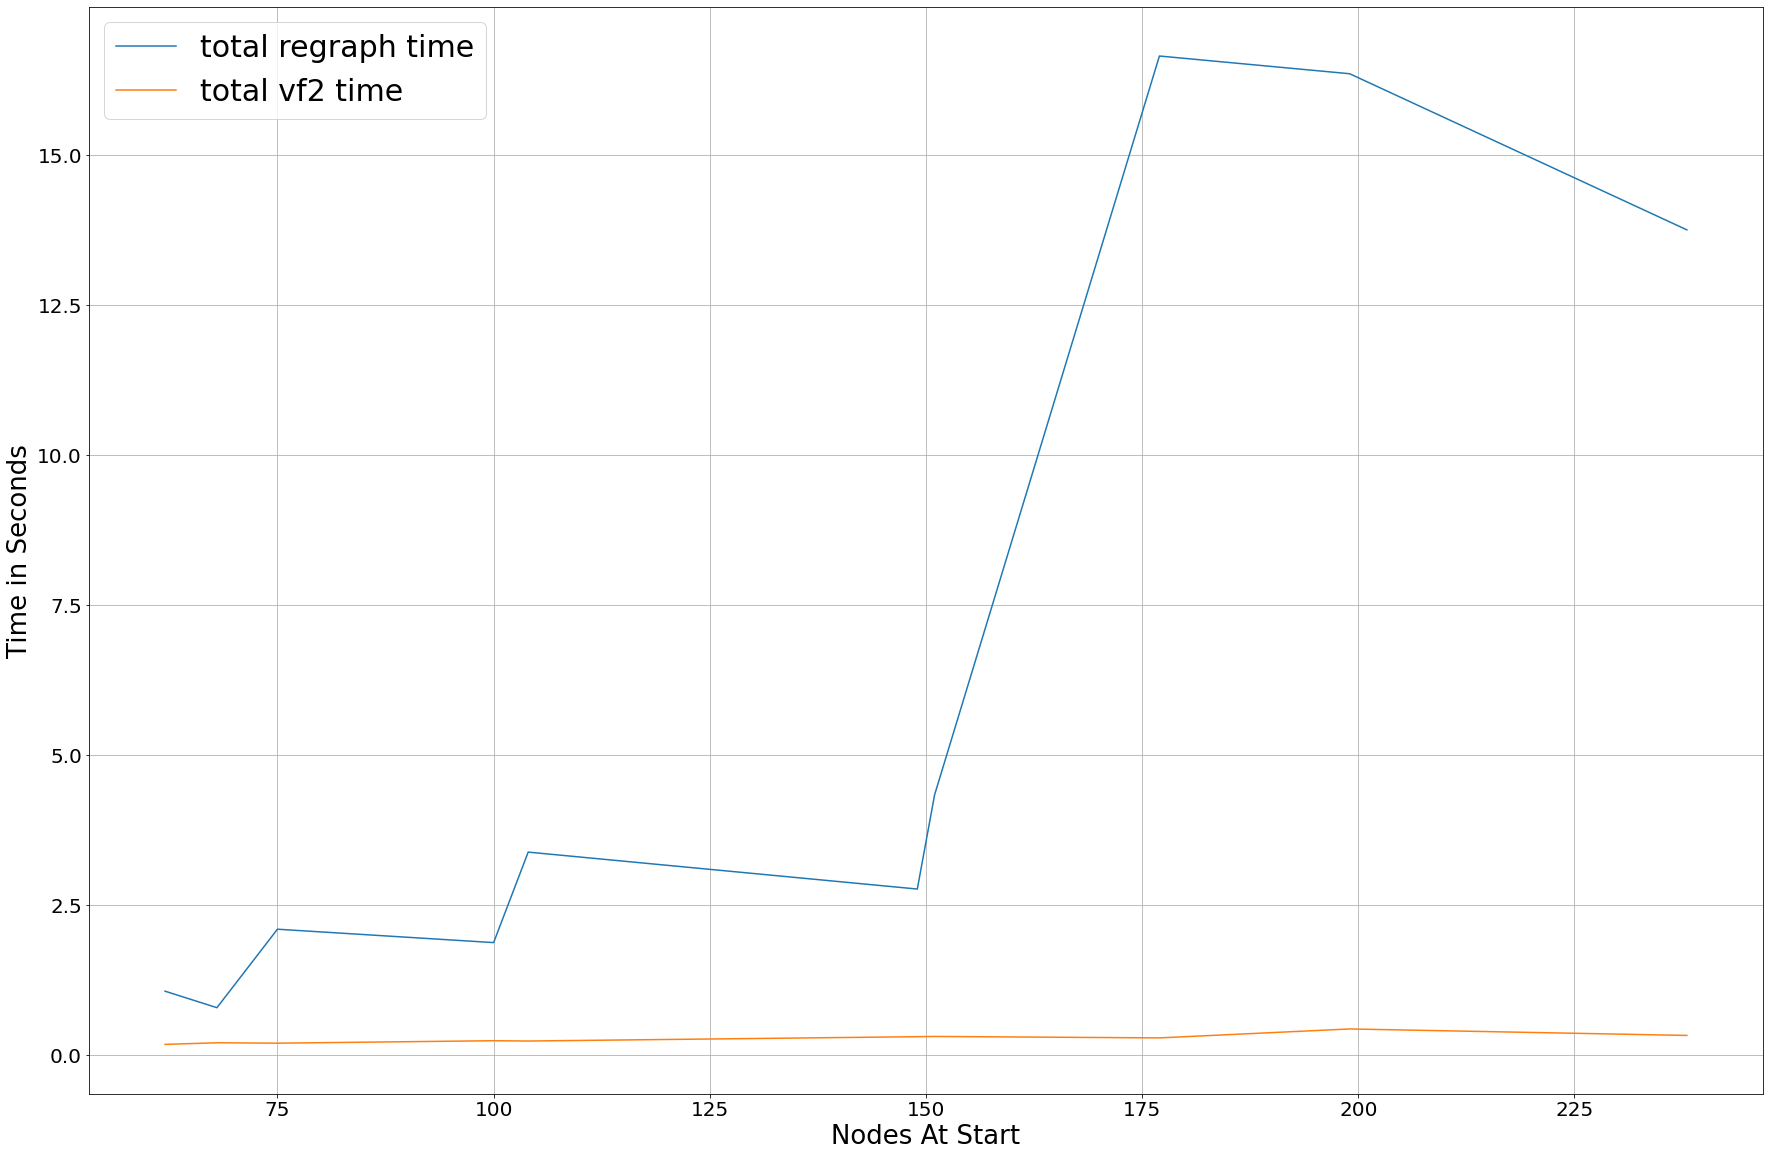

In [9]:
plt.figure()
plt.rcParams.update({'font.size': 26})
plot4 = vf2_vs_regraph.plot(figsize=(30,20), fontsize=20, grid=True, ylabel = "Time in Seconds", xlabel = "Nodes At Start").legend(fontsize=30)

### Rules part

In [7]:
rules_df = pd.read_csv("results/data/rules_concat.csv")
rules_df.head()

,rule id,rule name,rule type,time,instances,wildcard amount,generalized instances,wildcard rules


In [8]:
grouped_rules_data = rules_df[["rule id", "instances"]].groupby(["rule id"], dropna=True).mean()
grouped_rules_data.style
grouped_rules_data.sort_values("instances")

DataError: No numeric types to aggregate

In [ ]:
grouped_rules_data.plot()

In [ ]:
wildcards = rules_df[["rule id", "wildcard amount", "generalized instances", "wildcard rules"]]
wildcards = wildcards.loc[wildcards["wildcard amount"] > 0]